In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import activations
from tensorflow.keras import losses
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

import tensorflow.keras.backend as K

In [2]:
train_img = np.load('kmnist-train-imgs.npz')
train_labels = np.load('kmnist-train-labels.npz')
test_img = np.load('kmnist-test-imgs.npz')
test_labels = np.load('kmnist-test-labels.npz')

train_img = train_img['arr_0']
train_labels = train_labels['arr_0']
test_img = test_img['arr_0']
test_labels = test_labels['arr_0']

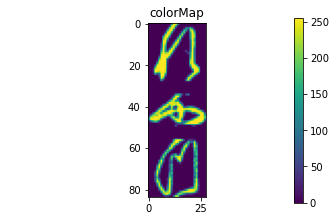

In [3]:
#random_image = random.randint(0, 5999)
#train_img[random_image] # I thought it'd be fun to see the diff characters
arr = np.concatenate((train_img[0], train_img[1], test_img[2]))
H = arr 

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [4]:
train_img = tf.reshape(train_img, [60000, 28, 28, 1])
test_img = tf.reshape(test_img, [10000, 28, 28, 1])

train_img = tf.cast(train_img, tf.float32)
test_img = tf.cast(test_img, tf.float32)

#train_img = 1/255
#test_img = 1/255

In [5]:
model = keras.Sequential([
       # tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Flatten(input_shape = train_img[0].shape),
        layers.Dense(16, activation="relu", input_shape = train_img[0].shape),
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(10, activation=tf.keras.activations.softmax)
    ])
#model.add(tf.keras.layers.Rescaling())
model.add(Flatten())

model.compile(loss='sparse_categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
# won't work without the steps per epoch?
# model.fit(epochs=10)
history = model.fit(x = train_img, y = train_labels, batch_size = 128, steps_per_epoch = 1, epochs=1000) # 100000 
avg_acc = 0
avg_loss = 0
for i, k in zip(history.history['loss'], history.history['acc']):
    avg_loss = i + avg_loss
    avg_acc = k + avg_acc

print('avg_loss = ', avg_loss / len(history.history['loss']))
print('avg_acc = ', avg_acc / len(history.history['acc']))
print("min loss: ", min(history.history['loss']))
print("max acc: ", max(history.history['acc']))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2023-05-09 22:08:34.480446: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2023-05-09 22:08:34.515133: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2600000000 Hz
2023-05-09 22:08:34.516589: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x556432175790 executing computations on platform Host. Devices:
2023-05-09 22:08:34.516908: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2023-05-09 22:08:34.523975: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2023-05-09 22:08:35.231665: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x556433968180 executing computations on platform CUDA. Devices:
2023-05-09 22:08:35.231711: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device 

Epoch 1/1000


2023-05-09 22:08:43.732943: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcublas.so.10


1/1 [==============================] - 6s 6s/step - loss: 13.9848 - acc: 0.0852
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 13.3242 - acc: 0.1120
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 12.7620 - acc: 0.1341
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 12.2484 - acc: 0.1525
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 11.7488 - acc: 0.1649
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 11.2423 - acc: 0.1723
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 10.7180 - acc: 0.1762
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 10.1203 - acc: 0.1780
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.4348 - acc: 0.1794
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 8.6849 - acc: 0.1784
Epoch 11/1000
1/1 [==============================] - 0s 10ms/step 

In [7]:
results = model.evaluate(test_img, test_labels, batch_size = 128, steps = 1)
predictions = model.predict(test_img, steps = 1)
print("predictions shape:", predictions.shape)
new_pred = []
pred = predictions.tolist()
for i in pred:
    new_pred.append(i.index(max(i)))

print("Accuracy Score: ", accuracy_score(new_pred, test_labels))
print("Confusion Matrix: \n", confusion_matrix(new_pred, test_labels))

1/1 [==============================] - 1s 522ms/step - loss: 1.9202 - acc: 0.3545
predictions shape: (10000, 10)
Accuracy Score:  0.3545
Confusion Matrix: 
 [[473   9  12  10  30  15  17  15  44  26]
 [  1 377   9   2  20  13  28   1  11   6]
 [  0   1   0   0   0   0   0   0   0   0]
 [  6   6   9 386   8   4   3  10   4   1]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 41   9  20   6   4 625  10   3  13   2]
 [  0  38  28   2  13   9 438   5  18   7]
 [440 541 910 590 910 330 503 943 879 673]
 [  7   6   1   3   2   0   0   3  24   6]
 [ 32  13  11   1  13   4   1  20   7 279]]


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(16, (1, 1), activation='relu', input_shape=train_img[0].shape))
model.add(layers.MaxPooling2D((2, 2))) # (1,1) (2, 2)
model.add(layers.Conv2D(16, (1, 1), activation='relu')) # out of memory when 28 
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation=tf.keras.activations.softmax))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        32        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 16)        272       
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                50192     
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [14]:
# won't work without the steps per epoch?
# model.fit(epochs=10)
history = model.fit(x = train_img, y = train_labels, batch_size = 128, steps_per_epoch = 1, epochs=1000) # 100000 
avg_acc = 0
avg_loss = 0
for i, k in zip(history.history['loss'], history.history['acc']):
    avg_loss = i + avg_loss
    avg_acc = k + avg_acc

print('avg_loss = ', avg_loss / len(history.history['loss']))
print('avg_acc = ', avg_acc / len(history.history['acc']))
print("min loss: ", min(history.history['loss']))
print("max acc: ", max(history.history['acc']))
results = model.evaluate(test_img, test_labels, batch_size = 128, steps = 1)
predictions = model.predict(test_img, steps = 1)
print("predictions shape:", predictions.shape)
new_pred = []
pred = predictions.tolist()
for i in pred:
    new_pred.append(i.index(max(i)))

print("Accuracy Score: ", accuracy_score(new_pred, test_labels))
print("Confusion Matrix: \n", confusion_matrix(new_pred, test_labels))

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 25.3337 - acc: 0.1049
Epoch 2/1000
1/1 [==============================] - 0s 337ms/step - loss: 16.8675 - acc: 0.1000
Epoch 3/1000
1/1 [==============================] - 0s 336ms/step - loss: 14.3890 - acc: 0.1003
Epoch 4/1000
1/1 [==============================] - 0s 340ms/step - loss: 12.7223 - acc: 0.1029
Epoch 5/1000
1/1 [==============================] - 0s 338ms/step - loss: 11.4139 - acc: 0.1047
Epoch 6/1000
1/1 [==============================] - 0s 336ms/step - loss: 10.3283 - acc: 0.1058
Epoch 7/1000
1/1 [==============================] - 0s 343ms/step - loss: 9.4023 - acc: 0.1065
Epoch 8/1000
1/1 [==============================] - 0s 341ms/step - loss: 8.6018 - acc: 0.1077
Epoch 9/1000
1/1 [==============================] - 0s 341ms/step - loss: 7.9000 - acc: 0.1089
Epoch 10/1000
1/1 [==============================] - 0s 343ms/step - loss: 7.2793 - acc: 0.1113
Epoch 11/1000
1/1 [===========================

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(16, (1, 1), activation='relu', input_shape=train_img[0].shape))
model.add(layers.MaxPooling2D((2, 2))) # (1,1) (2, 2)
model.add(layers.Conv2D(16, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation=tf.keras.activations.softmax))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 16)        32        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)        272       
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                50192     
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [27]:
# won't work without the steps per epoch?
# model.fit(epochs=10)
history = model.fit(x = train_img, y = train_labels, batch_size = 128, steps_per_epoch = 1, epochs=1000) # 100000 
avg_acc = 0
avg_loss = 0
for i, k in zip(history.history['loss'], history.history['acc']):
    avg_loss = i + avg_loss
    avg_acc = k + avg_acc

print('avg_loss = ', avg_loss / len(history.history['loss']))
print('avg_acc = ', avg_acc / len(history.history['acc']))
print("min loss: ", min(history.history['loss']))
print("max acc: ", max(history.history['acc']))

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 15.8932 - acc: 0.0722
Epoch 2/1000
1/1 [==============================] - 0s 339ms/step - loss: 5.2544 - acc: 0.1170
Epoch 3/1000
1/1 [==============================] - 0s 340ms/step - loss: 3.4570 - acc: 0.1567
Epoch 4/1000
1/1 [==============================] - 0s 342ms/step - loss: 3.3308 - acc: 0.1535
Epoch 5/1000
1/1 [==============================] - 0s 341ms/step - loss: 3.4691 - acc: 0.1392
Epoch 6/1000
1/1 [==============================] - 0s 341ms/step - loss: 3.4303 - acc: 0.1429
Epoch 7/1000
1/1 [==============================] - 0s 341ms/step - loss: 3.2174 - acc: 0.1628
Epoch 8/1000
1/1 [==============================] - 0s 341ms/step - loss: 2.9864 - acc: 0.1901
Epoch 9/1000
1/1 [==============================] - 0s 340ms/step - loss: 2.8146 - acc: 0.2061
Epoch 10/1000
1/1 [==============================] - 0s 341ms/step - loss: 2.6539 - acc: 0.2110
Epoch 11/1000
1/1 [==============================] 

In [15]:
results = model.evaluate(test_img, test_labels, batch_size = 128, steps = 1)
predictions = model.predict(test_img, steps = 1)
print("predictions shape:", predictions.shape)
new_pred = []
pred = predictions.tolist()
for i in pred:
    new_pred.append(i.index(max(i)))

print("Accuracy Score: ", accuracy_score(new_pred, test_labels))
print("Confusion Matrix: \n", confusion_matrix(new_pred, test_labels))

1/1 [==============================] - 0s 20ms/step - loss: 1.9666 - acc: 0.3013
predictions shape: (10000, 10)
Accuracy Score:  0.3013
Confusion Matrix: 
 [[790  24  35   6 245  15  12  58  37  38]
 [  0   2   4   0   1   6   1   0   5   0]
 [  1   2   1   2  10   4   1   1   1   2]
 [  0   0   0   1   0   0   0   0   0   0]
 [ 27   5   4   0  74   3   0   4   6  32]
 [  0   0   0   0   1   0   1   0   1   1]
 [144 873 818 950 599 899 956 907 239 406]
 [  0   1   0   0   0   1   0   1   0   0]
 [ 34  80 116  41  28  57  20  16 699  32]
 [  4  13  22   0  42  15   9  13  12 489]]


In [32]:
model = models.Sequential()
model.add(layers.Conv2D(16, (1, 1), activation='relu', input_shape=train_img[0].shape))
model.add(layers.MaxPooling2D((2, 2))) # (1,1) (2, 2)
model.add(layers.Conv2D(16, (1, 1), activation='relu'))
model.add(layers.Conv2D(16, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation=tf.keras.activations.softmax))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 16)        32        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 16)        272       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 16)        272       
_________________________________________________________________
flatten_8 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                50192     
_________________________________________________________________
dense_23 (Dense)             (None, 16)               

In [33]:
# won't work without the steps per epoch?
# model.fit(epochs=10)
history = model.fit(x = train_img, y = train_labels, batch_size = 128, steps_per_epoch = 1, epochs=1000) # 100000 
avg_acc = 0
avg_loss = 0
for i, k in zip(history.history['loss'], history.history['acc']):
    avg_loss = i + avg_loss
    avg_acc = k + avg_acc

print('avg_loss = ', avg_loss / len(history.history['loss']))
print('avg_acc = ', avg_acc / len(history.history['acc']))
print("min loss: ", min(history.history['loss']))
print("max acc: ", max(history.history['acc']))
results = model.evaluate(test_img, test_labels, batch_size = 128, steps = 1)
predictions = model.predict(test_img, steps = 1)
print("predictions shape:", predictions.shape)
new_pred = []
pred = predictions.tolist()
for i in pred:
    new_pred.append(i.index(max(i)))

print("Accuracy Score: ", accuracy_score(new_pred, test_labels))
print("Confusion Matrix: \n", confusion_matrix(new_pred, test_labels))

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 5.6140 - acc: 0.0892
Epoch 2/1000
1/1 [==============================] - 0s 407ms/step - loss: 4.1597 - acc: 0.0901
Epoch 3/1000
1/1 [==============================] - 0s 409ms/step - loss: 3.4089 - acc: 0.1024
Epoch 4/1000
1/1 [==============================] - 0s 411ms/step - loss: 2.6926 - acc: 0.1228
Epoch 5/1000
1/1 [==============================] - 0s 405ms/step - loss: 2.3489 - acc: 0.1475
Epoch 6/1000
1/1 [==============================] - 0s 405ms/step - loss: 2.2630 - acc: 0.1543
Epoch 7/1000
1/1 [==============================] - 0s 404ms/step - loss: 2.2402 - acc: 0.1573
Epoch 8/1000
1/1 [==============================] - 0s 404ms/step - loss: 2.2248 - acc: 0.1663
Epoch 9/1000
1/1 [==============================] - 0s 404ms/step - loss: 2.2094 - acc: 0.1768
Epoch 10/1000
1/1 [==============================] - 0s 404ms/step - loss: 2.1967 - acc: 0.1854
Epoch 11/1000
1/1 [==============================] -

In [12]:
results = model.evaluate(test_img, test_labels, batch_size = 128, steps = 1)
predictions = model.predict(test_img, steps = 1)
print("predictions shape:", predictions.shape)
new_pred = []
pred = predictions.tolist()
for i in pred:
    new_pred.append(i.index(max(i)))

print("Accuracy Score: ", accuracy_score(new_pred, test_labels))
print("Confusion Matrix: \n", confusion_matrix(new_pred, test_labels))

1/1 [==============================] - 1s 813ms/step - loss: 1.3618 - acc: 0.5751
predictions shape: (10000, 10)
Accuracy Score:  0.5751
Confusion Matrix: 
 [[767   9  17   7  83  12   9  63  17  39]
 [ 25 634 124 154 106  61 110 144  53 147]
 [  3  33 488  50  51 106 109  33  59  77]
 [  6   4  36 428  32  26  40  44  20  14]
 [ 47 117  61  39 563  16  46 162  17 161]
 [ 59  12  28  35  12 707   9   9  11  13]
 [  0  71  63  12  25  30 556   8 103   8]
 [ 35  13  41 133  48   5  52 468   9  55]
 [ 46  89 120 135  44  32  60  46 707  53]
 [ 12  18  22   7  36   5   9  23   4 433]]
